In [ ]:
# LinearRegression()
# DecisionTreeRegressor()
# 히트탭
# 데이터 shape

# diabetes.csv

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #과학용 계산 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#회귀 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 0. CSV 파일 불러오기
file = "C:/AI/abalone.csv"  # CSV 파일 경로
df = pd.read_csv(file)
print(df)

        id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485   

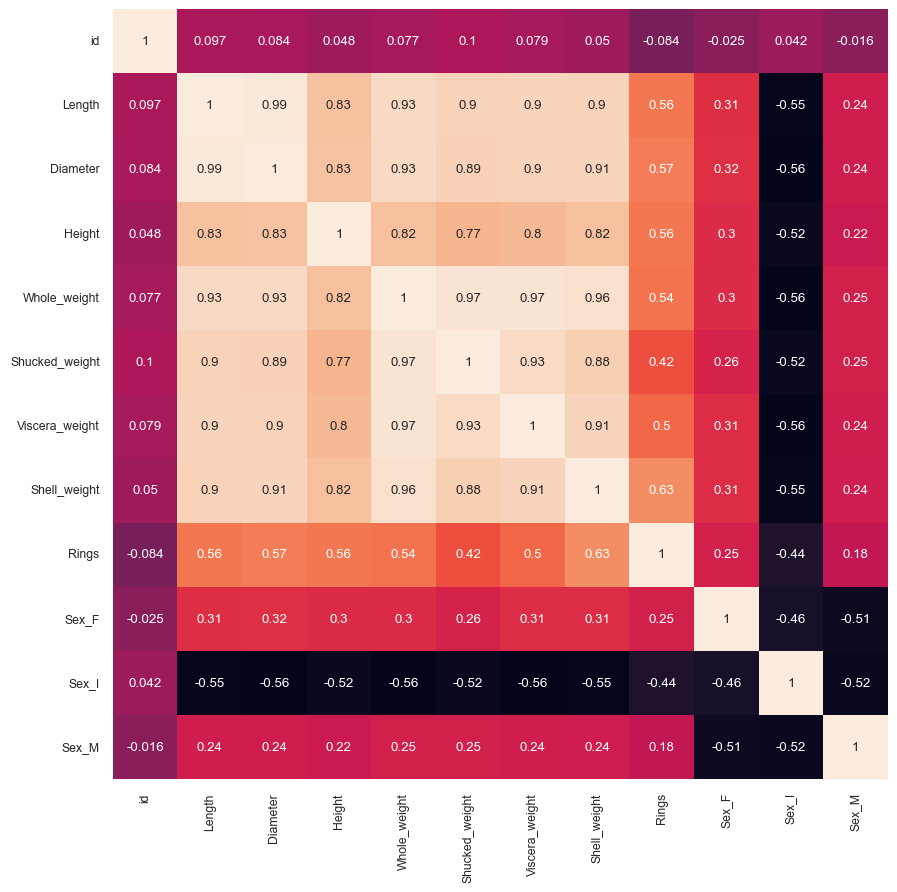

결측치 확인:
 id                0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

 X and Y SHAPE: 
 (3341, 10) (3341,)
(836, 10) (836,)

<<Result>>
Linear Regression의 평균제곱근오차 4.888545716208134


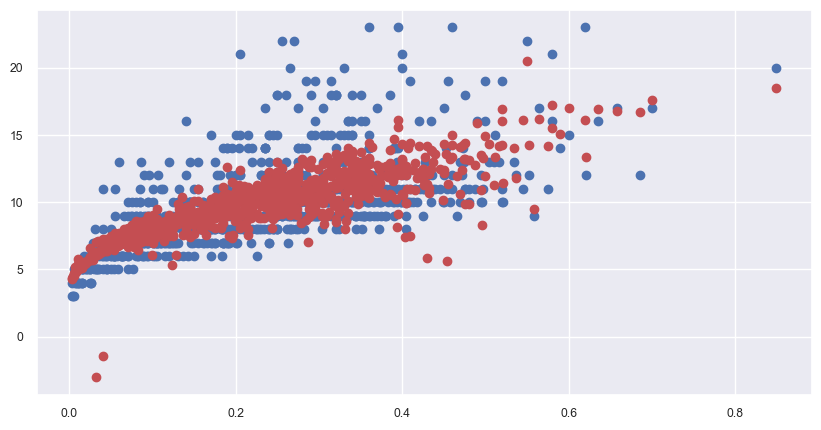

DecisionTree Regression의 평균제곱근오차 9.514354066985646


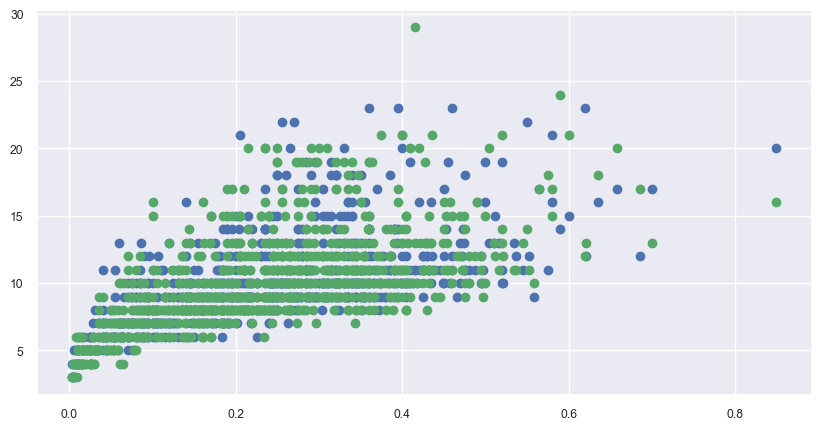

In [33]:
# 1. 상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_one_hot = pd.get_dummies(df, columns=['Sex'])
df_corr=df_one_hot.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


# 2. 데이터 전처리 (X: 특성, y: 타겟)
print("결측치 확인:\n", df_one_hot.isnull().sum())
X = df_one_hot.drop(columns=['Rings', 'id'])
y = df_one_hot["Rings"]


# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n X and Y SHAPE: \n", X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


# 4. 회귀 모델 학습
print("\n<<Result>>")
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
ly_preds = model_LR.predict(X_test)
print('Linear Regression의 평균제곱근오차', mean_squared_error(ly_preds, y_test))
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='r', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)
dy_preds = model_DT.predict(X_test)
print('DecisionTree Regression의 평균제곱근오차', mean_squared_error(dy_preds, y_test))
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()
